# Customer Segmentation for E-Commerce

## Introduction
In today's highly competitive e-commerce landscape, understanding customer behavior is crucial for businesses aiming to maintain a competitive edge. Customer segmentation, a powerful data-driven approach, allows companies to categorize their customer base into distinct groups based on purchasing behavior and other relevant characteristics. By leveraging these insights, businesses can tailor their marketing strategies, enhance customer satisfaction, and ultimately drive growth.

This project focuses on applying advanced clustering techniques to segment customers from an e-commerce platform based on their transaction data. By identifying distinct customer segments, the business can implement more personalized marketing strategies, leading to improved customer retention and increased profitability.

#### Dataset link : https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset

## About the data
The dataset gives a clear picture of how customers use an e-commerce platform. Each record represents a customer and includes details like their ID, age, gender, and city. It also tracks their shopping behavior—how much they spend, how many items they buy, how often they shop, and whether they use discounts. Additionally, the data captures their satisfaction levels through ratings and feedback. This information helps us understand customer preferences and habits, enabling businesses to make smarter decisions to improve customer satisfaction and loyalty.

The dataset from the "E-commerce Customer Behavior" file contains the following columns:
* Customer ID: Unique identifier for each customer.
* Gender: Gender of the customer (Male/Female).
* Age: Age of the customer.
* City: City where the customer is located.
* Membership Type: Type of membership (Gold/Silver/Bronze).
* Total Spend: Total amount spent by the customer.
* Items Purchased: Number of items purchased.
* Average Rating: Average rating given by the customer.
* Discount Applied: Indicates whether a discount was applied (True/False).
* Days Since Last Purchase: Number of days since the customer's last purchase.
* Satisfaction Level: Level of customer satisfaction (Satisfied/Neutral/Unsatisfied).

## Importing libraries

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing dataset

In [304]:
data=pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

## Data Exploration

In [305]:
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [307]:
data.drop("Customer ID", axis=1, inplace=True)

In [308]:
data.shape

(350, 10)

In [309]:
data.describe()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,33.597143,845.381714,12.600000,4.019143,26.588571
std,4.870882,362.058695,4.155984,0.580539,13.440813
min,26.000000,410.800000,7.000000,3.000000,9.000000
25%,30.000000,502.000000,9.000000,3.500000,15.000000
50%,32.500000,775.200000,12.000000,4.100000,23.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000


In [310]:
data.describe(include='object').T

,count,unique,top,freq
Gender,350,2,Female,175
City,350,6,New York,59
Membership Type,350,3,Gold,117
Satisfaction Level,348,3,Satisfied,125


In [311]:
data.select_dtypes(include='object').nunique()

Gender                2
City                  6
Membership Type       3
Satisfaction Level    3
dtype: int64

In [312]:
data['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

In [313]:
satisfaction_counts = data['Satisfaction Level'].value_counts()
print(satisfaction_counts)

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64


In [314]:
genderwise_counts = data['Gender'].value_counts()
print(genderwise_counts)

Gender
Female    175
Male      175
Name: count, dtype: int64


In [315]:
membership_counts = data['Membership Type'].value_counts()
print(membership_counts)

Membership Type
Gold      117
Silver    117
Bronze    116
Name: count, dtype: int64


In [316]:
city_counts = data['City'].value_counts()
print(city_counts)

City
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64


## Data Cleaning

In [317]:
data.isnull().sum()

Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [318]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    348 non-null    object 
 1   Age                       348 non-null    int64  
 2   City                      348 non-null    object 
 3   Membership Type           348 non-null    object 
 4   Total Spend               348 non-null    float64
 5   Items Purchased           348 non-null    int64  
 6   Average Rating            348 non-null    float64
 7   Discount Applied          348 non-null    bool   
 8   Days Since Last Purchase  348 non-null    int64  
 9   Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 27.5+ KB


In [319]:
df=data.copy()

## Exploratory Data Analysis

###### 
Now that we've familiarized ourselves with the structure of our dataframe, we can start examining each column individually. To streamline this process, we'll define two functions: one tailored for analyzing categorical columns and another for numerical columns.

In [320]:
def categorical_column(df,col_name):
    '''
    Plots a pie chart showing the distribution of categories in a specified column of a DataFrame.
    '''
    distribution = df[col_name].value_counts().reset_index()
    print(distribution)
    counts = df[col_name].value_counts()
    palette = sns.color_palette('Set3', len(counts))
    plt.figure(figsize=(4,4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=palette, wedgeprops=dict(edgecolor='black', linewidth=0.8))
    plt.axis('equal')
    plt.title(col_name,fontsize=15)
    plt.show()
    
def numerical_column(df,col_name):
    '''
    Provides statistical summaries and a histogram for a specified numerical column in a DataFrame.
    '''
    print(f'{col_name} description:')
    print(f'The average value is: {round(df[col_name].mean(),2)}')
    print(f'The minumun value is: {round(df[col_name].min(),2)}')
    print(f'The median value is: {round(df[col_name].median(),2)}')
    print(f'The maximun value is: {round(df[col_name].max(),2)}')
    plt.figure(figsize=(4,4))
    sns.histplot(x=col_name, data=df, bins=18, color='salmon',kde=True)
    plt.show() 

#### Gender

   Gender  count
0    Male    175
1  Female    173


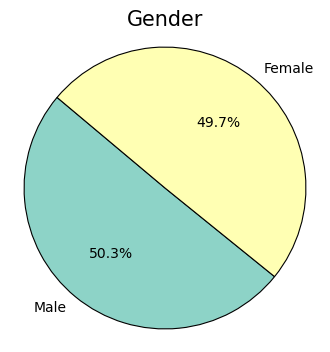

In [321]:
categorical_column(df, 'Gender')

##### 
From above plot, we found that the male and female populations are almost equally represented in our dataset. There are only two more men than women, likely due to the two rows we previously removed.

#### City

            City  count
0       New York     59
1    Los Angeles     59
2        Chicago     58
3  San Francisco     58
4          Miami     58
5        Houston     56


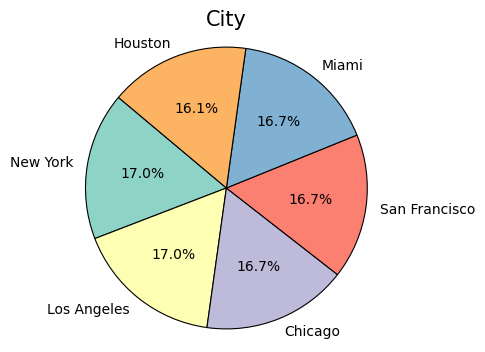

In [322]:
categorical_column(df, 'City')

##### 
When examining the cities our clients come from, we observed that our sample has nearly the same number of cases for each of the six cities.

#### Membership Type

  Membership Type  count
0            Gold    117
1          Silver    117
2          Bronze    114


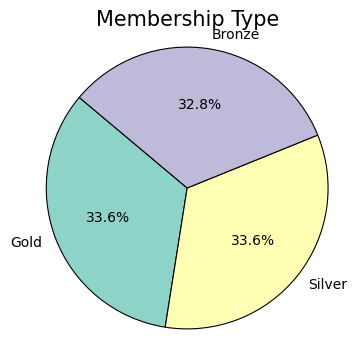

In [323]:
categorical_column(df, 'Membership Type')

##### 
The distribution of memberships is also the same for the three categories, bronze, silver and gold.

#### Satisfaction Level

  Satisfaction Level  count
0          Satisfied    125
1        Unsatisfied    116
2            Neutral    107


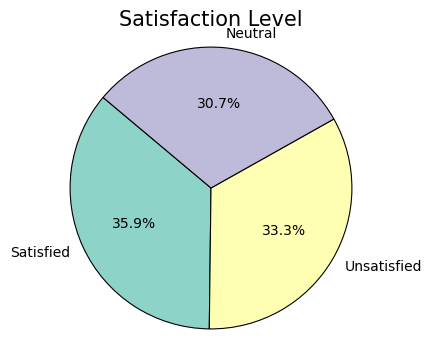

In [324]:
categorical_column(df, 'Satisfaction Level')

##### 
we found that the distribution between satisfied, neutral and unsatisfied is quite even.

#### Discount Applied

   Discount Applied  count
0              True    175
1             False    173


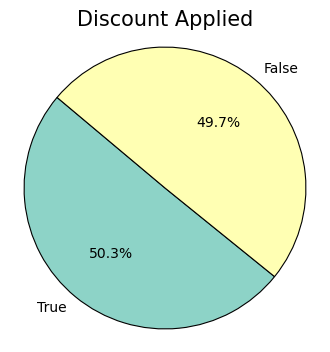

In [325]:
categorical_column(df, 'Discount Applied')

##### 
From above plot, it is clear that half of our customers are applying discounts and the other half are not.

#### Age

Age description:
The average value is: 33.58
The minumun value is: 26
The median value is: 32.0
The maximun value is: 43


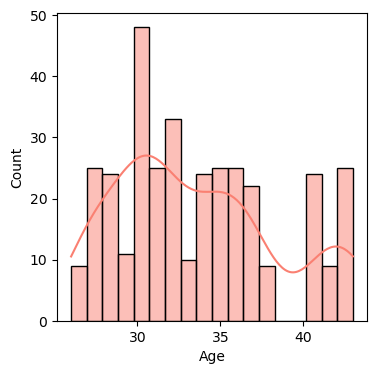

In [326]:
numerical_column(df,'Age')

##### 
From above plot, we find that the age range of our clients is from 26 to 43.The age of customers shows a varied distribution, indicating a diverse customer base.

#### Total Spend

Total Spend description:
The average value is: 847.79
The minumun value is: 410.8
The median value is: 780.2
The maximun value is: 1520.1


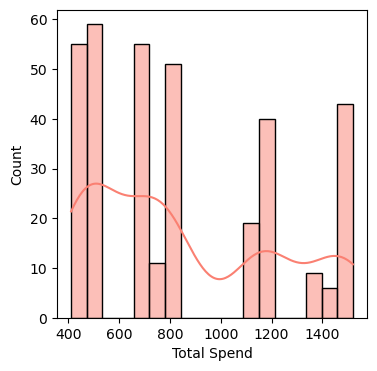

In [327]:
numerical_column(df,'Total Spend')

##### 
The distribution of total spending suggests that most customers spend within a certain range, with fewer customers spending significantly higher amounts.

Looking at the total spent by our clients we can see four subgroups of expenses. To simplify our analysis we are going to create a new column classifying our clients into four subgroups:

1. Expenses up to 550.
2. Expenses between 550 and 850.
3. Expenses between 850 and 1250.
4. Expenses greater than 1250.

In [328]:
expenses_bins_edge = [0,550,850,1250,np.inf]
expenses_labels = ['Expenses up to 550', 'Expenses between 550 and 850', 'Expenses between 850 and 1250', 'Expenses greater than 1250']
df['Expenses'] = pd.cut(df['Total Spend'], bins=expenses_bins_edge, labels=expenses_labels, right=True, include_lowest=True)

#### Item Purchased

Items Purchased description:
The average value is: 12.63
The minumun value is: 7
The median value is: 12.0
The maximun value is: 21


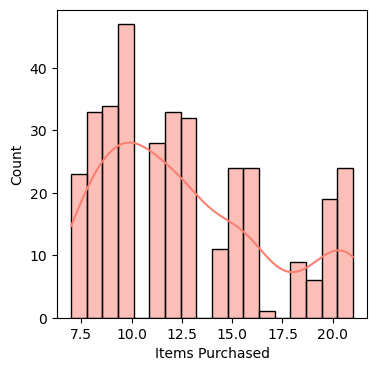

In [329]:
numerical_column(df,'Items Purchased')

##### 
This distribution reveals how many items customers typically purchase, with a peak at certain values indicating common purchasing patterns.

Apparently the customers buy an average of 12 items. Likewise, we observe four subgroups. To simplify our analysis we are going to create a new column classifying our clients into four subgroups:

1. Less than 10 items.
2. Between 10 and 15 items.
3. Between 15 and 20 items.
4. More than 20 items.

In [330]:
items_bins_edge = [0,10,15,20,np.inf]
items_labels = ['Less than 10 items', 'Between 10 and 15 items', 'Between 15 and 20 items', 'More than 20 items' ]
df['Items'] = pd.cut(df['Items Purchased'], bins=items_bins_edge, labels=items_labels, right=True, include_lowest=True)

#### Average Rating

Average Rating description:
The average value is: 4.02
The minumun value is: 3.0
The median value is: 4.1
The maximun value is: 4.9


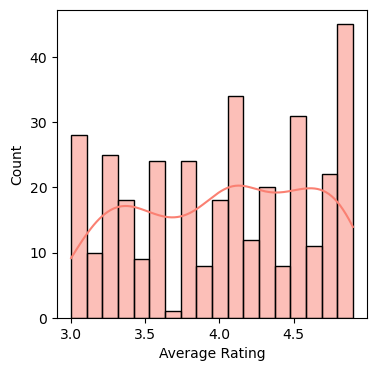

In [331]:
numerical_column(df,'Average Rating')

##### 
The distribution of average ratings given by customers shows how they generally perceive the service or products.

In general, customers seem to have a good opinion of the company, since there is no rating below 3.0 points and the average is 4.0 points. To simplify our analysis we are going to create a new column classifying our clients into four subgroups:

1. 3.0 - 3.5
2. 3.5 - 4.0
3. 4.0 - 4.5
4. 4.5 - 5.0

In [332]:
rating_bins_edge = [3,3.5,4,4.5,5]
rating_labels = ['3.0 - 3.5', '3.5 - 4.0', '4.0 - 4.5', '4.5 - 5.0']
df['Rating'] = pd.cut(df['Average Rating'], bins=rating_bins_edge, labels=rating_labels, right=True, include_lowest=True)

#### Day Since Last Purchase

Days Since Last Purchase description:
The average value is: 26.61
The minumun value is: 9
The median value is: 23.0
The maximun value is: 63


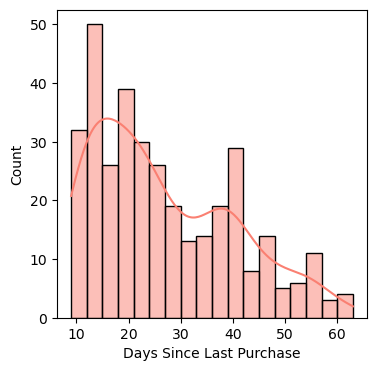

In [333]:
numerical_column(df,'Days Since Last Purchase')

##### 
This indicates the frequency of purchases, with certain periods being more common for repeat purchases.

The range of days since our customers' last purchase goes from 9 days to 63 days, with a decreasing trend as the days go by. To simplify our analysis we are going to create a new column classifying our clients into four subgroups:

1. Less than 20 days.
2. Between 20 and 40 days.
3. Between 40 and 60 days.
4. More than 60 days.

In [334]:
purchase_bins_edge = [0,20,40,60, np.inf]
purchase_labels = ['Less than 20 days', 'Between 20 and 40 days', 'Between 40 and 60 days', 'More than 60 days']
df['Last Purchase'] = pd.cut(df['Days Since Last Purchase'], bins=purchase_bins_edge, labels=purchase_labels, right=True, include_lowest=True)

### Customer Behavior Analysis by Gender

With a better grasp of our data, we can now explore customer behavior based on gender.We'll build a function to examine how various characteristics are distributed across genders.

In [335]:
def gender_analysis(df,column_name):
    """
    Analyzes and visualizes the distribution of a specified column split by gender.
    """
    distribution = df[['Gender', column_name]].value_counts().reset_index().sort_values(by=column_name)
    print(distribution)
    plt.figure(figsize=(16,6))
    palette = {'Male': 'cornflowerblue', 'Female': 'lightcoral'}
    sns.barplot(data=distribution, x=column_name, y='count', hue='Gender', palette = palette,edgecolor='black')
    plt.title(f'{column_name} Distribution')
    plt.show()

#### Gender vs Age

    Gender  Age  count
14    Male   26      9
1     Male   27     25
10    Male   28     24
18  Female   29      2
13    Male   29      9
7     Male   30     24
9   Female   30     24
3   Female   31     24
19    Male   31      1
2     Male   32     24
16  Female   32      9
12    Male   33     10
4     Male   34     24
5     Male   35     24
20  Female   35      1
21    Male   36      1
6   Female   36     24
11  Female   37     22
15  Female   38      9
8   Female   41     24
17  Female   42      9
0   Female   43     25


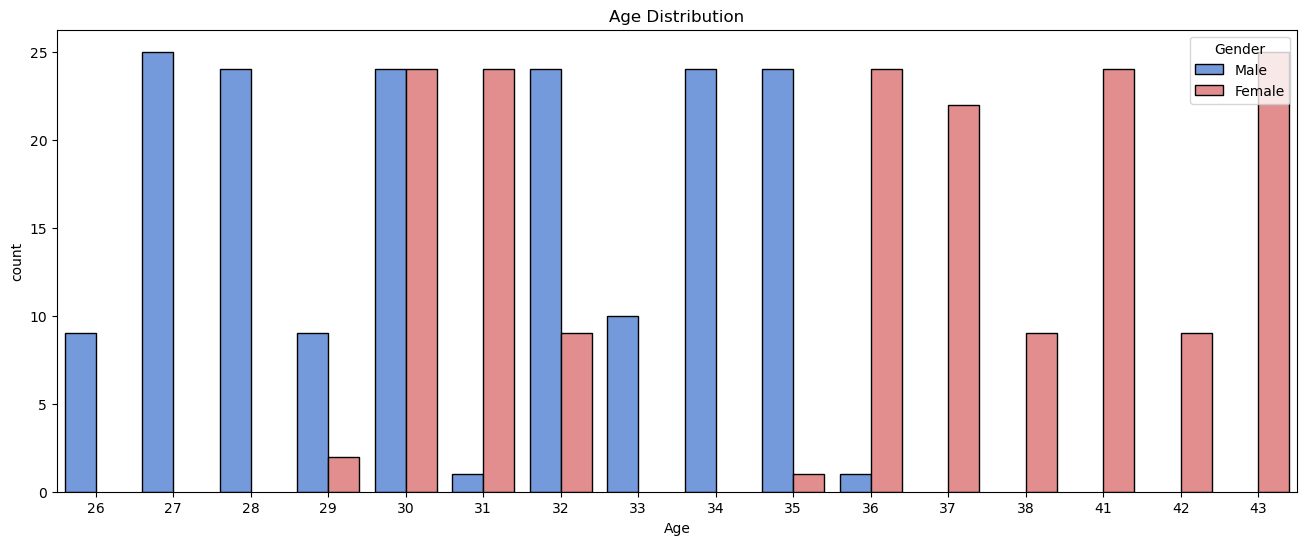

In [336]:
gender_analysis(df, 'Age')

##### 
When we look at the age distribution of our customers by gender, we see a clear pattern. Our youngest customers are mostly men, our oldest customers are mostly women, and customers around the average age of 33 include both men and women. This could mean that:

* Young men are more interested in our products, but their interest fades as they get older.
* Young women are less interested in our products, but their interest grows as they get older.

#### Gender vs City

   Gender           City  count
1  Female        Chicago     58
5  Female        Houston     56
0    Male    Los Angeles     59
4    Male          Miami     57
6  Female          Miami      1
2  Female       New York     58
7    Male       New York      1
3    Male  San Francisco     58


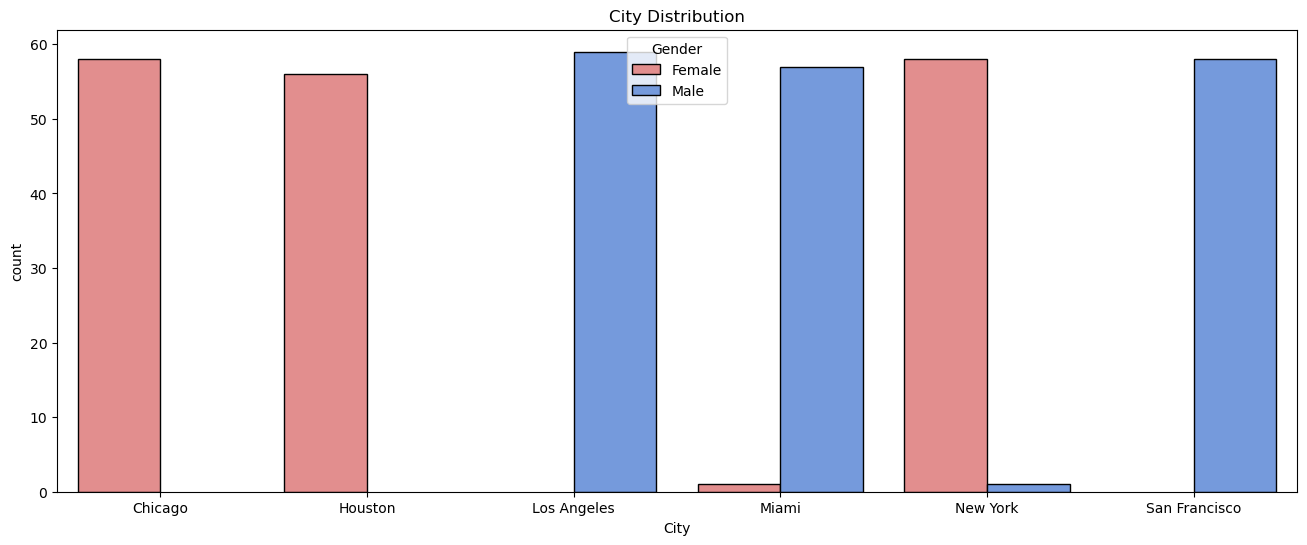

In [337]:
gender_analysis(df, 'City')

##### 
When we looked at the distribution of our clients by city and gender, we noticed something interesting. In each city, almost all the customers are of one gender (Miami and New York don’t really count because there’s only one person of the opposite gender in each).

This could mean two things:
1. There might have been an error when collecting data for our analysis. If that's the case, we might need to redo the sampling or expand it to get a more balanced gender distribution in each city.

2. If there was no error and this is the actual distribution, the issue might be related to our marketing and advertising efforts. It’s possible that our ads are different in each city, attracting mostly one gender. This could also explain the differences in age distribution by gender that we noticed earlier.

#### Gender vs Membership Type

   Gender Membership Type  count
1  Female          Bronze    114
2    Male            Gold     59
3  Female            Gold     58
0    Male          Silver    116
4  Female          Silver      1


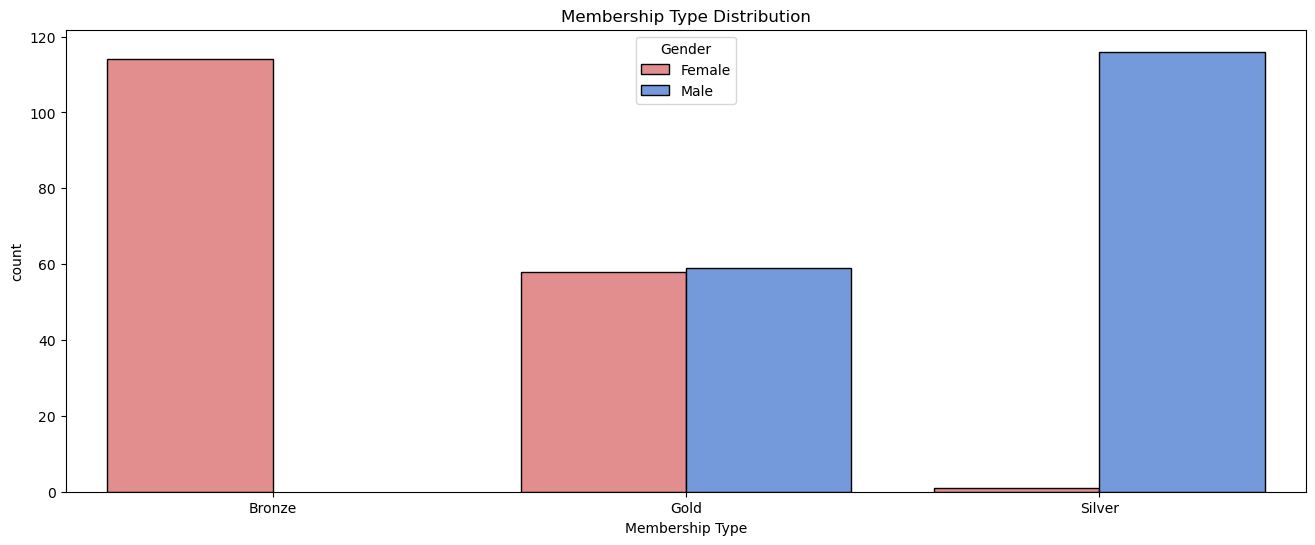

In [338]:
gender_analysis(df, 'Membership Type')

##### 
When analyzing the distribution of membership types by gender we observed the following:

1. The distribution of our gold clients is equitable for both genders.
2. Gold customers aside, women prefer bronze membership while men prefer silver membership.

#### Gender vs Total Spend

   Gender                       Expenses  count
1  Female             Expenses up to 550    114
0    Male   Expenses between 550 and 850    116
4  Female   Expenses between 550 and 850      1
2  Female  Expenses between 850 and 1250     58
5    Male  Expenses between 850 and 1250      1
3    Male     Expenses greater than 1250     58


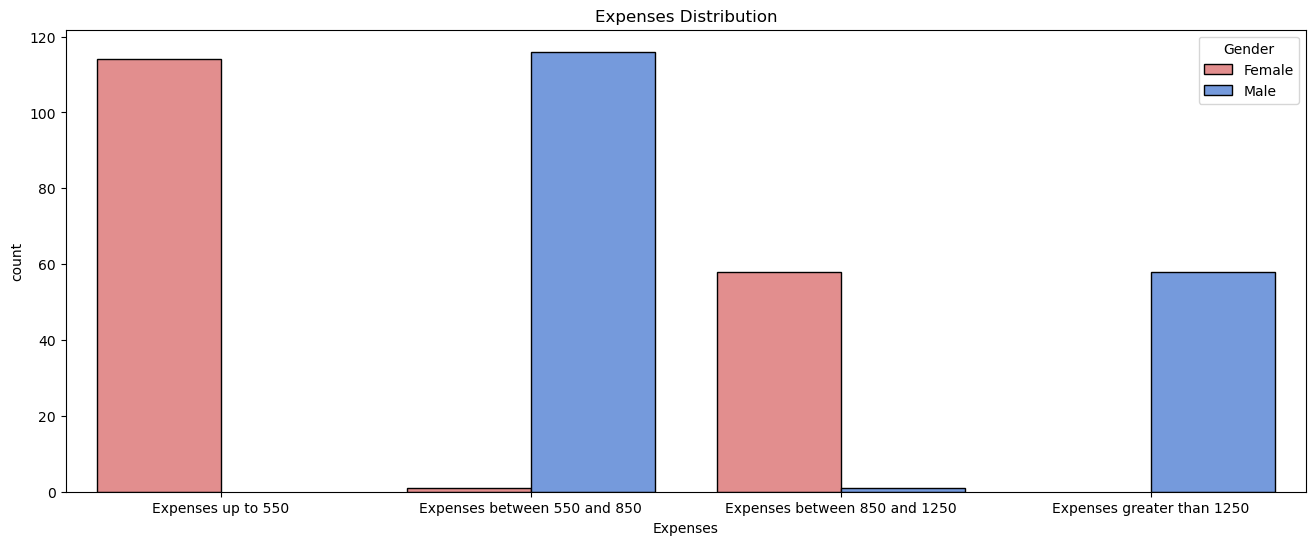

In [339]:
gender_analysis(df,'Expenses')

In [340]:
total_spend_by_gender = df.groupby('Gender')['Total Spend'].sum()
print(total_spend_by_gender)

Gender
Female    122318.4
Male      172713.6
Name: Total Spend, dtype: float64


##### 
When analyzing the total expenses by gender we observe that:
1. Two-thirds of women spend less than 550 usd, while the rest spend no more than 1,250 usd.
2. Two-thirds of men spend between 550 usd and 850 usd, while the rest spend more than 1,250 usd.
Likewise, men spent a total of almost 50,000 usd more than women.

#### Gender vs Discount Applied

   Gender  Discount Applied  count
1    Male             False    117
3  Female             False     56
0  Female              True    117
2    Male              True     58


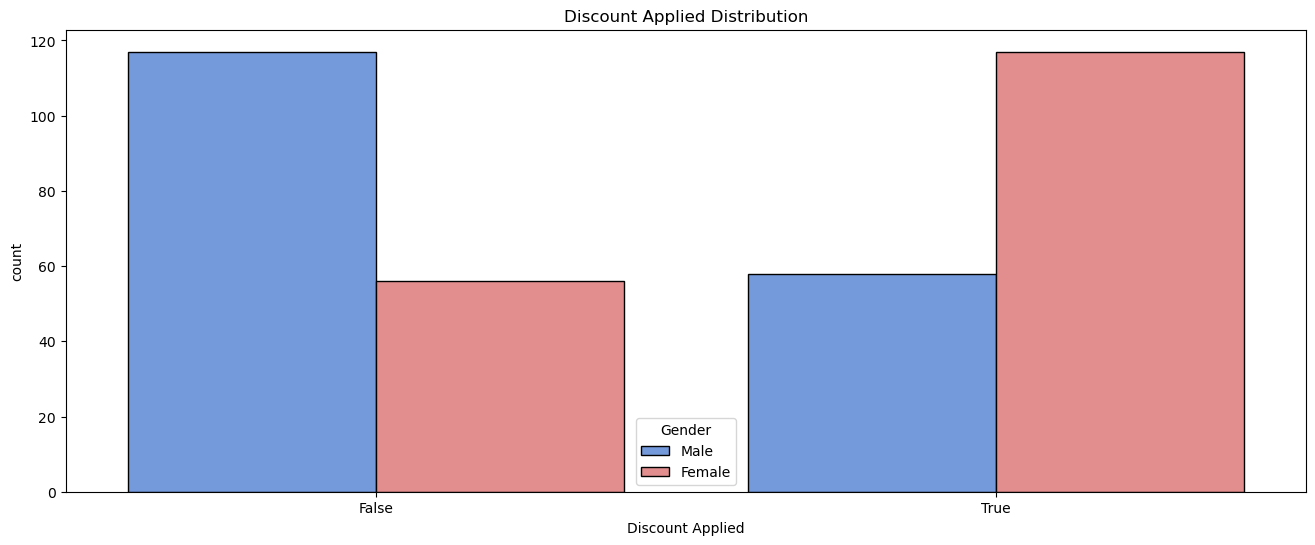

In [341]:
gender_analysis(df,'Discount Applied')

##### 
Like other patterns we've seen, there appears to be an opposite trend in discount usage between genders. Two-thirds of women use discounts, while two-thirds of men do not.

#### Gender vs Item Purchased

   Gender                    Items  count
0  Female       Less than 10 items    114
6    Male       Less than 10 items     23
1    Male  Between 10 and 15 items     93
2  Female  Between 10 and 15 items     35
3    Male  Between 15 and 20 items     35
4  Female  Between 15 and 20 items     24
5    Male       More than 20 items     24


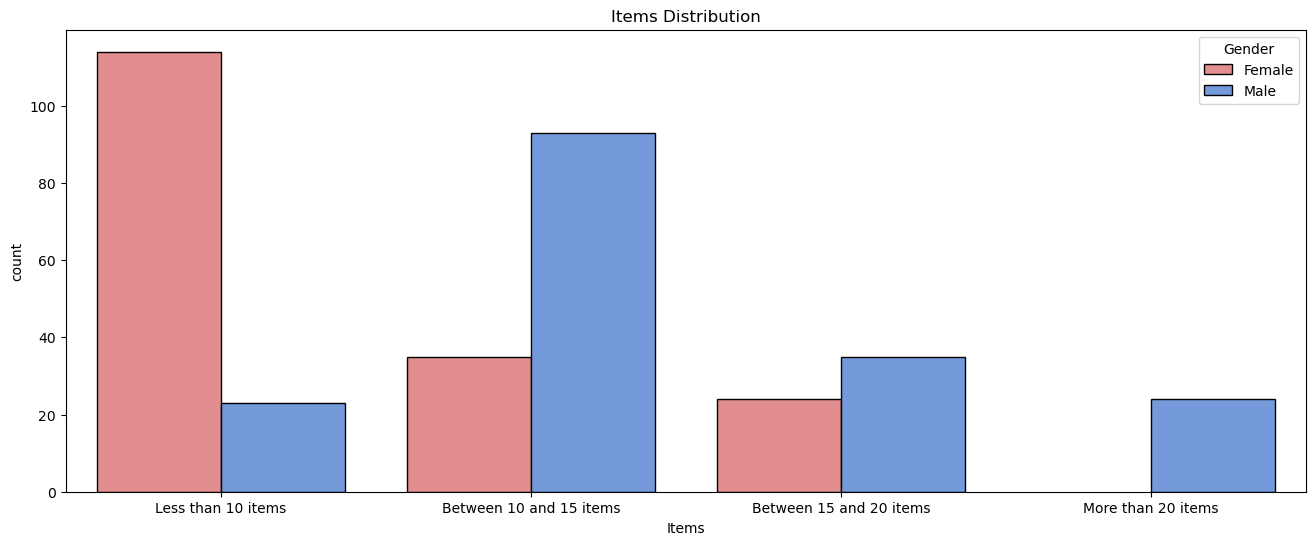

In [342]:
gender_analysis(df,'Items')

In [343]:
total_items_by_gender = df.groupby('Gender')['Items Purchased'].sum()
print(total_items_by_gender)
print(" ")
avg_price_item = round(total_spend_by_gender / total_items_by_gender, 2)
print(avg_price_item)

Gender
Female    1869
Male      2527
Name: Items Purchased, dtype: int64
 
Gender
Female    65.45
Male      68.35
dtype: float64


##### 
When analyzing the number of items purchased by gender, we discovered that:
1. Most women bought less than 10 items and the rest never bought more than 20 items.
2. Most men bought between 10 and 15 items, but many men also bought more than 20 items.

Additionally, we found that men purchased around 700 more items than women. However, when calculating the average cost of the items we discovered that women spend an average of 65 usd per item, while men spend an average of 68 usd per item. The difference is not very high, which may indicate that men tend to buy cheaper objects but in greater quantities.

#### Gender vs Day Since Last Purchase

   Gender           Last Purchase  count
1    Male       Less than 20 days    117
3  Female       Less than 20 days     30
0  Female  Between 20 and 40 days    123
4    Male  Between 20 and 40 days     23
2    Male  Between 40 and 60 days     32
5  Female  Between 40 and 60 days     20
6    Male       More than 60 days      3


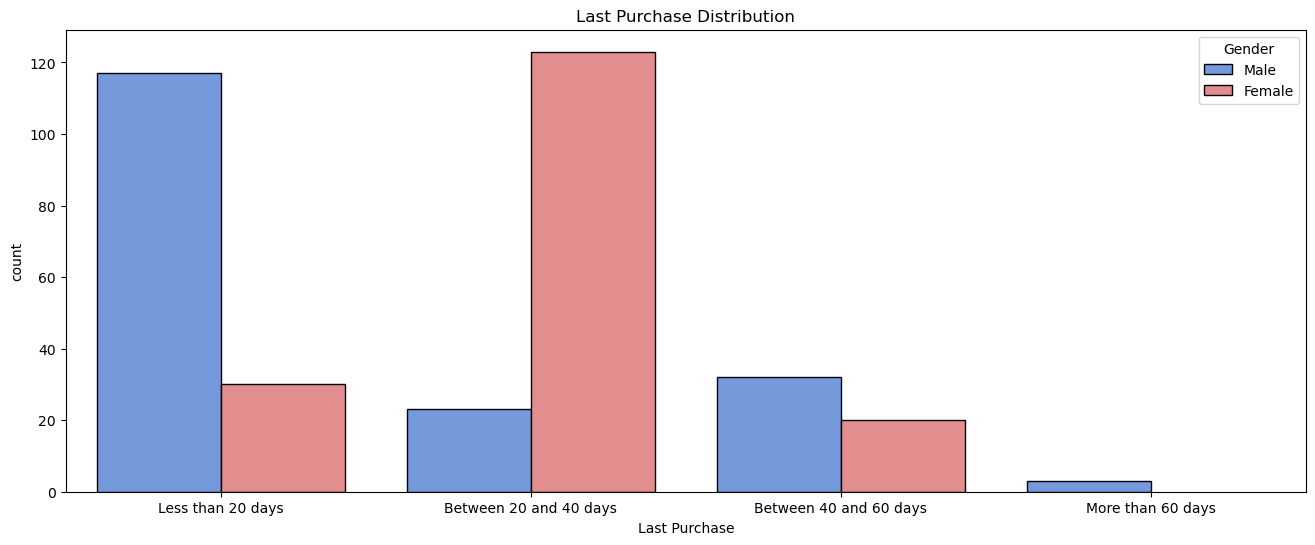

In [344]:
gender_analysis(df,'Last Purchase')

##### 
From above plot, it can be seen, the time since the last purchase is shorter in men than in women.

#### Gender vs Average Rating

   Gender     Rating  count
0  Female  3.0 - 3.5     90
3    Male  3.5 - 4.0     50
5  Female  3.5 - 4.0     25
1    Male  4.0 - 4.5     66
4  Female  4.0 - 4.5     39
2    Male  4.5 - 5.0     59
6  Female  4.5 - 5.0     19


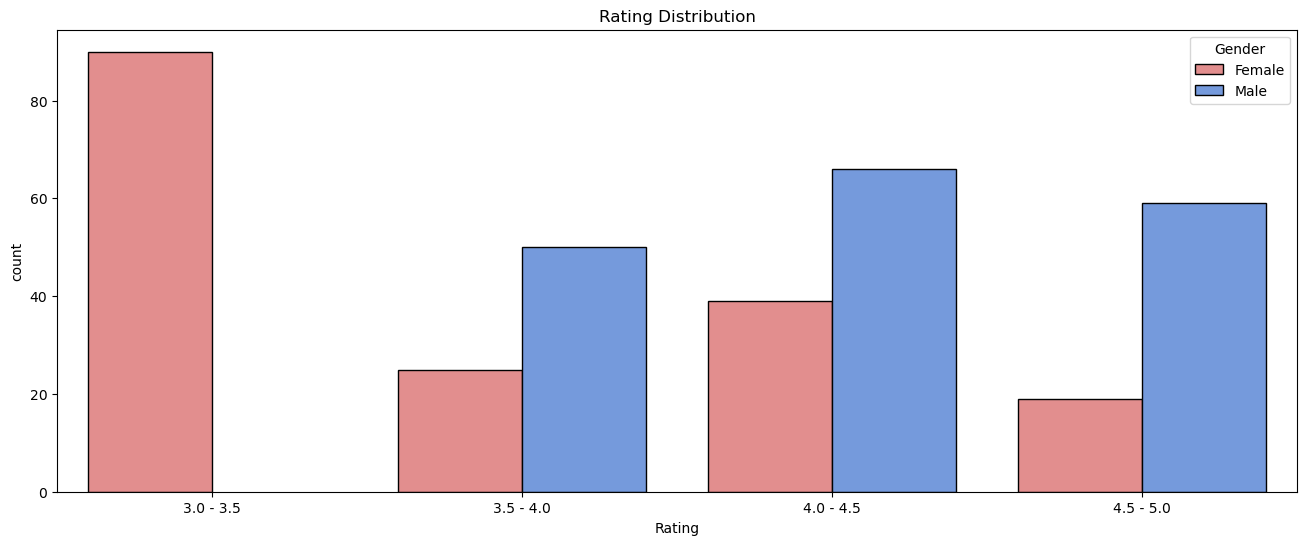

In [345]:
gender_analysis(df,'Rating')

##### 
When analyzing the average rating given by the customer for purchased items we can observe the following:
1. Most women rank articles between 3.0 and 3.5.
2. Most men rank articles above 4.0.
3. As we will see in the next point, the average rating may be influencing the level of satisfaction of our clients.

#### Gender vs Satisfaction Level

   Gender Satisfaction Level  count
4  Female            Neutral     56
5    Male            Neutral     51
0    Male          Satisfied     67
2  Female          Satisfied     58
1  Female        Unsatisfied     59
3    Male        Unsatisfied     57


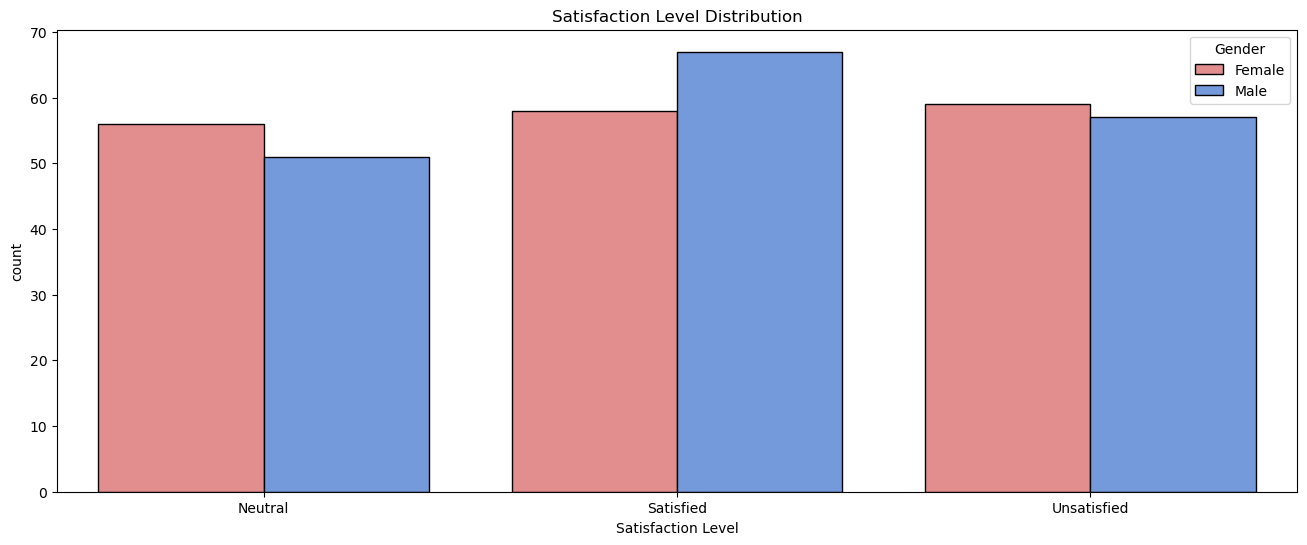

In [346]:
gender_analysis(df,'Satisfaction Level')

##### 
It seems that the satisfaction levels of our customers are quite similar between women and men, with the level of approval being a little higher in men.

##### 
From our detailed analysis, we can observe some key differences and similarities between our male and female clients:

- **Age Distribution**: Most of our male clients are younger than 36, while most of our female clients are older than 36. However, both genders share a common age range between 29 and 33.
  
- **Behavioral Insights**: This age difference might help us understand our clients' behavior better. For instance, women generally make fewer purchases and use discounts more often, which could be because they have more balanced spending and shopping habits as they age. On the other hand, younger men, who tend to make more purchases and spend more, might have less mature shopping habits typical of younger individuals.

- **Satisfaction and Ratings**: The age gap could also explain differences in customer satisfaction and the ratings they give. As people age, their expectations and demands might increase, which could affect how satisfied they are with our products.

Understanding these age-related patterns can be crucial for tailoring our marketing strategies and improving customer satisfaction.

### Customer behaviour analysis of total spend in different categories
With a better grasp of our data, we can now explore customer behavior based on total spend in different categories. We'll build a function to examine how various characteristics are distributed across total spend.

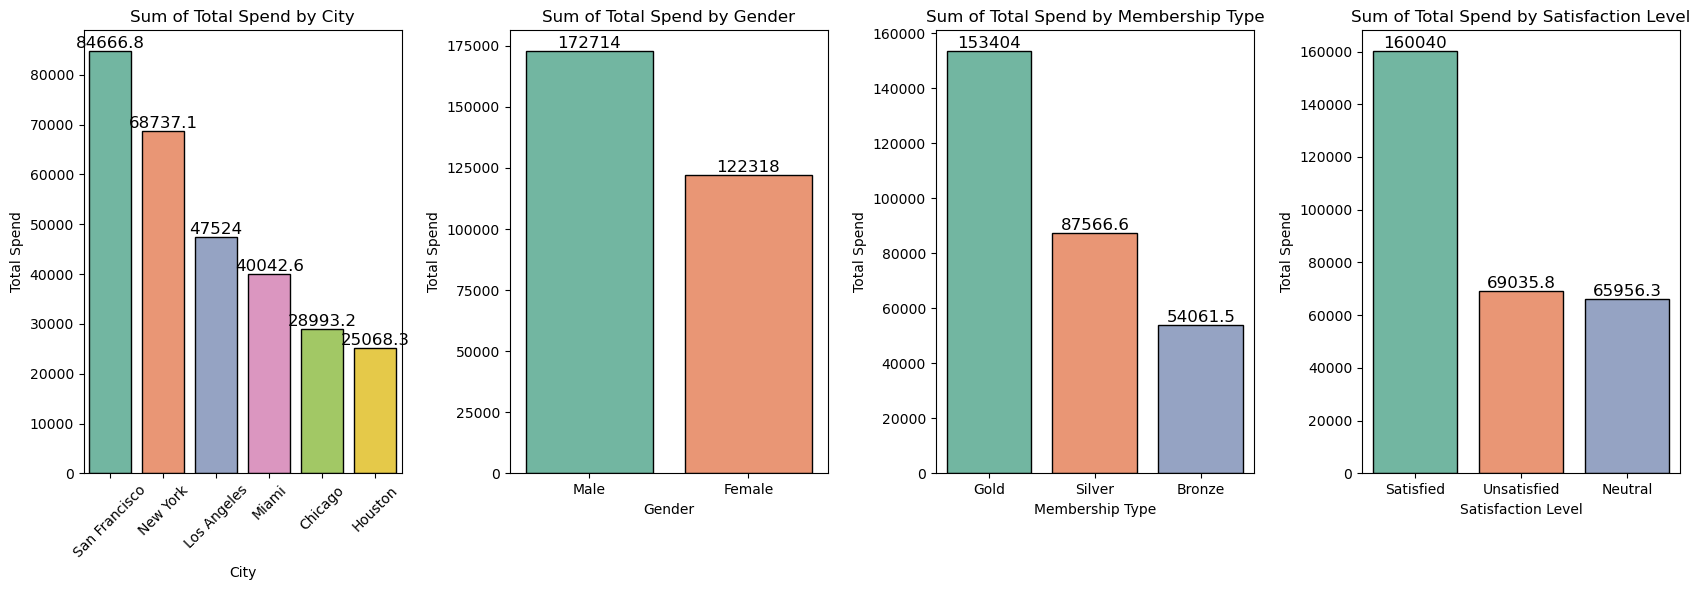

In [347]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot(numerical, categorical, axes):
    grouped = df.groupby(categorical)
    p_df = pd.DataFrame(grouped[numerical].sum())
    p_df = p_df.sort_values(numerical, ascending=False)
    sns.barplot(x=p_df.index, y=p_df[numerical], ax=axes, palette='Set2',edgecolor='black')
    for container in axes.containers:
        axes.bar_label(container, size=12)
        
    if len(p_df) >= 4:
        axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
        
    axes.set_title("Sum of {} by {}".format(numerical, categorical))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 6))
index = 0
for i in ["City", "Gender", "Membership Type", "Satisfaction Level"]:
    plot("Total Spend", i, axes[index])
    index += 1
plt.tight_layout()
plt.show()

##### 
Based on the four charts :

1. City-wise spending:
   - San Francisco has the highest total spend at around $86,000.
   - New York follows as the second-highest spending city.
   - Houston has the lowest total spend among the cities shown.

2. Gender-based spending:
   - Male customers have a significantly higher total spend (about $175,000) compared to female customers 
   (about 122,000).

3. Membership type spending:
   - Gold members contribute the most to total spend, followed by Silver and then Bronze.
   - There's a substantial difference between Gold and Bronze member spending.

4. Satisfaction level and spending:
   - Satisfied customers have the highest total spend (about $160,000).
   - There's not a large difference between spending of unsatisfied and neutral customers.

5. Overall insights:
   - The business seems to perform best in larger cities, particularly San Francisco and New York.
   - There's an opportunity to increase engagement and spending among female customers.
   - Gold membership is the most valuable tier, suggesting a focus on upselling to higher tiers could be beneficial.
   - Customer satisfaction correlates strongly with spending, indicating that improving satisfaction could lead to increased revenue.

In [348]:
def total_spend_analysis(df,column_name):
    """
    Analyzes and visualizes the distribution of total spend.
    """
    plt.figure(figsize=(4,4))
    sns.scatterplot(x=column_name, y='Total Spend', data=df,alpha=0.5)
    plt.xlabel(column_name)
    plt.ylabel('Total Spend')
    plt.title(f'Total Spend vs {column_name}')
    plt.show()

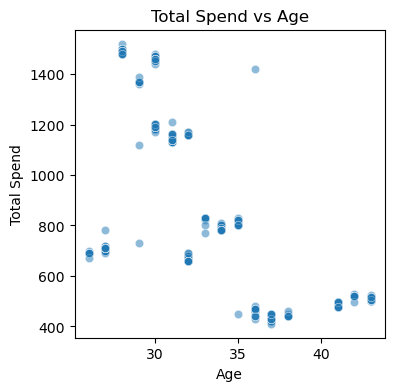

In [349]:
total_spend_analysis(df,'Age')

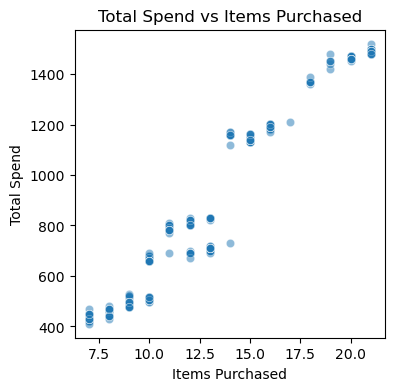

In [350]:
total_spend_analysis(df,'Items Purchased')

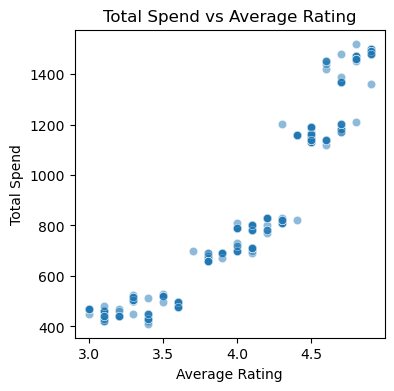

In [351]:
total_spend_analysis(df,'Average Rating')

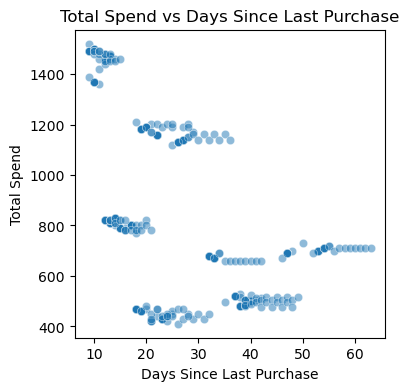

In [352]:
total_spend_analysis(df,'Days Since Last Purchase')

##### 
* Total Spend vs Age: There doesn't appear to be a clear linear relationship between age and total spending, suggesting that age may not be the primary factor influencing spending.

* Total Spend vs Items Purchased: There seems to be a positive correlation between the number of items purchased and the total spending, which is intuitive.

* Total Spend vs Average Rating: This plot doesn't show a clear relationship between the average rating and total spending.

* Total Spend vs Days Since Last Purchase: There is no clear pattern indicating a relationship between the days since the last purchase and total spending.

#### Average Spend in different Age groups

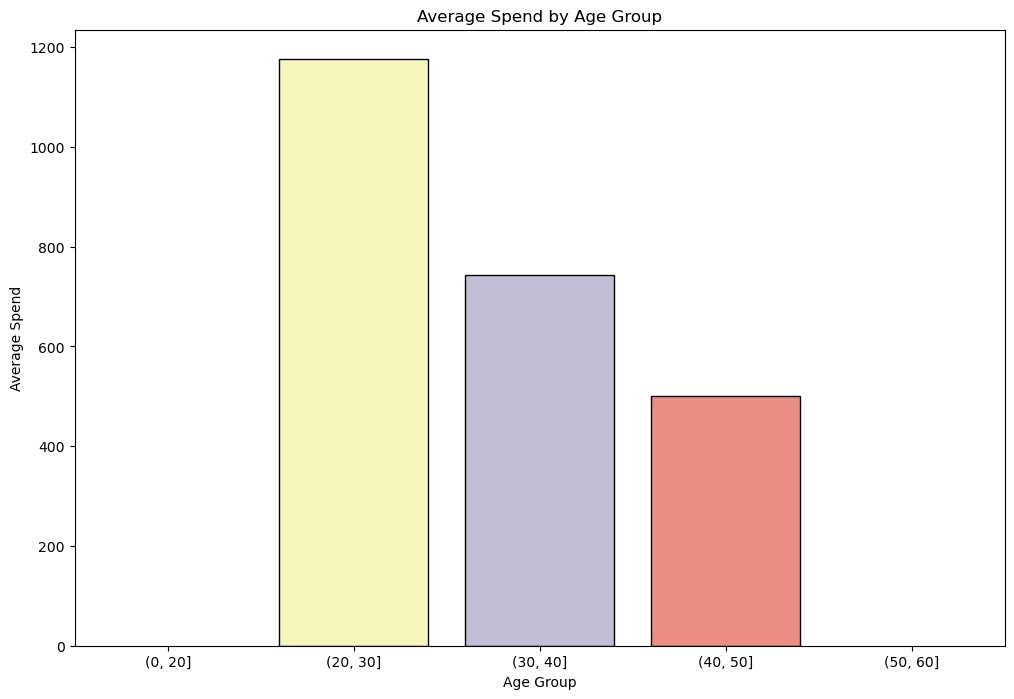

In [353]:
age_bins = [0, 20, 30, 40, 50, 60]

df['Age Group'] = pd.cut(df['Age'], bins=age_bins)

age_group_analysis = df.groupby('Age Group').agg(
    Average_Spend=('Total Spend', 'mean'),
    Average_Items=('Items Purchased', 'mean'),
    Average_Rating=('Average Rating', 'mean')
).reset_index()

# Visualizing the results 
plt.figure(figsize=(12, 8))
palette = sns.color_palette('Set3')
sns.barplot(x='Age Group', y='Average_Spend', data=age_group_analysis,palette='Set3',edgecolor='black')
plt.title('Average Spend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.show()


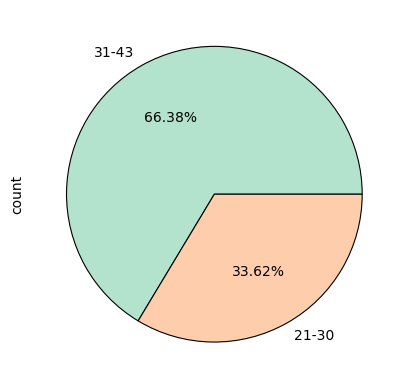

In [354]:
# making a new column for age group
age_grp=['21-30','31-43']
df['age_group'] = pd.cut(df.Age,bins=np.arange(15,46,15),labels=age_grp,right=True)

# visualize the distribution of age groups
palette = sns.color_palette('Pastel2')
df['age_group'].value_counts().plot.pie(autopct='%.2f%%', colors=palette, wedgeprops=dict(edgecolor='black', linewidth=0.8))
plt.show()

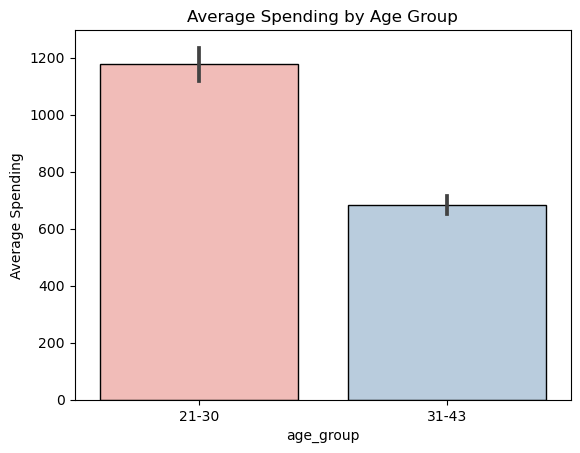

In [355]:
# average spending by age group
sns.barplot(data=df, x='age_group', y='Total Spend',palette='Pastel1',edgecolor='black')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

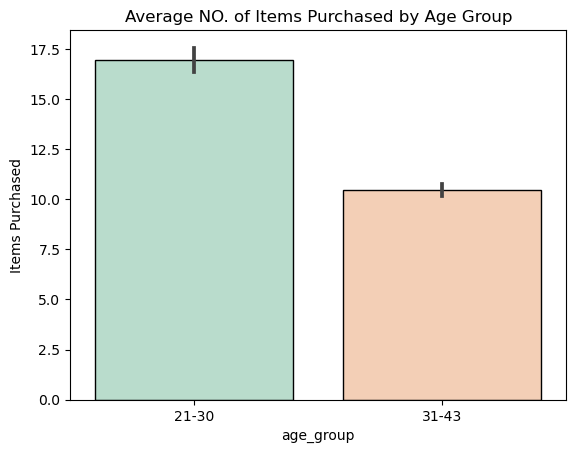

In [356]:
# average number of items purchased by age group
sns.barplot(data=df, x='age_group', y='Items Purchased',palette='Pastel2',edgecolor='black')
plt.title('Average NO. of Items Purchased by Age Group')
plt.show()

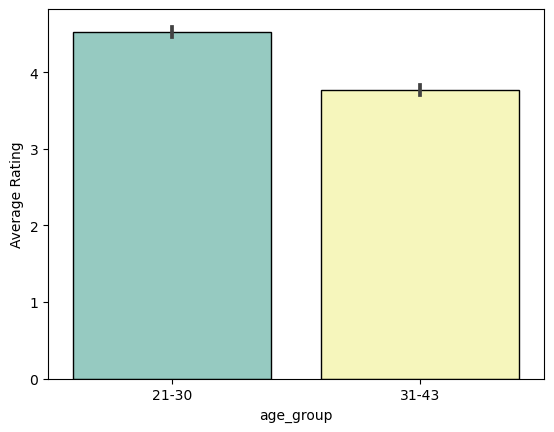

In [357]:
# average Rating by Age Group
sns.barplot(data=df, x='age_group', y='Average Rating',palette='Set3',edgecolor='black')
plt.show()

##### 
From above plots it can be clearly see that, although the 21-30 age group makes up 33.62% of our customer base and the 31-43 age group comprises 66.38%, the younger group spends more, buys more items, and gives higher ratings than the older group. This suggests that while the older age group represents a larger portion of our customers, the younger group is more engaged and satisfied with their purchases.


### Correlation

In [358]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Membership Type'] = label_encoder.fit_transform(df['Membership Type'])
df['Satisfaction Level'] = label_encoder.fit_transform(df['Satisfaction Level'])

# Encode boolean column
df['Discount Applied'] = df['Discount Applied'].astype(int)


corr_matrix = df[['Gender','Age','City','Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating','Discount Applied', 'Days Since Last Purchase','Satisfaction Level']].corr()
corr_matrix

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Gender,1.000000,-0.581774,0.483359,0.807679,0.387471,0.439175,0.492687,-0.344872,-0.214256,0.010589
Age,-0.581774,1.000000,-0.876826,-0.652237,-0.676826,-0.684397,-0.721752,0.061262,0.170437,0.007227
City,0.483359,-0.876826,1.000000,0.472328,0.921276,0.891535,0.887721,-0.099413,-0.403373,-0.013901
Membership Type,0.807679,-0.652237,0.472328,1.000000,0.302370,0.302532,0.504575,-0.010643,-0.042688,0.021701
Total Spend,0.387471,-0.676826,0.921276,0.302370,1.000000,0.972276,0.941190,-0.168530,-0.544679,-0.045252
Items Purchased,0.439175,-0.684397,0.891535,0.302532,0.972276,1.000000,0.921396,-0.123037,-0.425425,0.084417
Average Rating,0.492687,-0.721752,0.887721,0.504575,0.941190,0.921396,1.000000,-0.076756,-0.435921,0.006135
Discount Applied,-0.344872,0.061262,-0.099413,-0.010643,-0.168530,-0.123037,-0.076756,1.000000,0.760032,0.800748
Days Since Last Purchase,-0.214256,0.170437,-0.403373,-0.042688,-0.544679,-0.425425,-0.435921,0.760032,1.000000,0.716017
Satisfaction Level,0.010589,0.007227,-0.013901,0.021701,-0.045252,0.084417,0.006135,0.800748,0.716017,1.000000


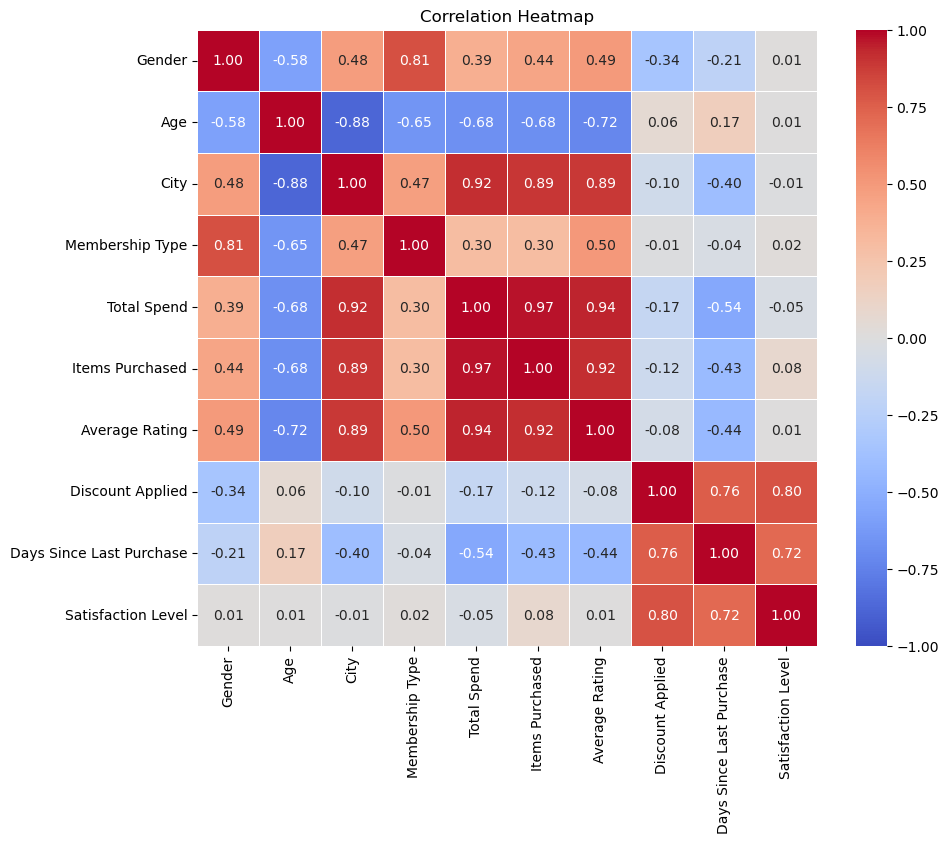

In [359]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

##### 
This correlation heatmap provides valuable insights into customer behavior and relationships between different variables. Here are some key observations:

1. Total Spend correlations:
   - Strong positive correlation with Items Purchased (0.97) and Average Rating (0.94)
   - High correlation with City (0.92), suggesting location significantly impacts spending
   - Moderate positive correlation with Gender (0.39) and Membership Type (0.30)
   - Negative correlation with Age (-0.68), indicating younger customers may spend more

2. Gender relationships:
   - Strong correlation with Membership Type (0.81), suggesting gender may influence membership choices
   - Moderate correlation with City (0.48) and Average Rating (0.49)
   - Negative correlation with Age (-0.58)

3. City impacts:
   - Very strong correlation with Total Spend (0.92) and Items Purchased (0.89)
   - Strong negative correlation with Age (-0.88), implying younger people in certain cities spend more

4. Membership Type:
   - Strong correlation with Gender (0.81)
   - Moderate correlation with City (0.47) and Average Rating (0.50)

5. Customer satisfaction (Satisfaction Level):
   - Strong positive correlation with Discount Applied (0.80) and Days Since Last Purchase (0.72)
   - Weak or no correlation with other factors like Total Spend (-0.05) or Gender (0.01)

6. Discount Applied:
   - Strong positive correlation with Satisfaction Level (0.80) and Days Since Last Purchase (0.76)
   - Negative correlation with Total Spend (-0.17) and Items Purchased (-0.12)

7. Age correlations:
   - Negative correlations with most factors, especially City (-0.88) and Average Rating (-0.72)

These insights can inform targeted marketing strategies, personalized customer experiences, and business decisions to optimize revenue and customer satisfaction. For example, focusing on younger customers in specific cities, tailoring membership offers based on gender, and strategically applying discounts to boost satisfaction and encourage purchases.

In [360]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Expenses,Items,Rating,Last Purchase,Age Group,age_group
0,0,29,4,1,1120.20,14,4.6,1,25,1,Expenses between 850 and 1250,Between 10 and 15 items,4.5 - 5.0,Between 20 and 40 days,"(20, 30]",21-30
1,1,34,2,2,780.50,11,4.1,0,18,0,Expenses between 550 and 850,Between 10 and 15 items,4.0 - 4.5,Less than 20 days,"(30, 40]",31-43
2,0,43,0,0,510.75,9,3.4,1,42,2,Expenses up to 550,Less than 10 items,3.0 - 3.5,Between 40 and 60 days,"(40, 50]",31-43
3,1,30,5,1,1480.30,19,4.7,0,12,1,Expenses greater than 1250,Between 15 and 20 items,4.5 - 5.0,Less than 20 days,"(20, 30]",21-30
4,1,27,3,2,720.40,13,4.0,1,55,2,Expenses between 550 and 850,Between 10 and 15 items,3.5 - 4.0,Between 40 and 60 days,"(20, 30]",21-30


In [361]:
data.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    348 non-null    object 
 1   Age                       348 non-null    int64  
 2   City                      348 non-null    object 
 3   Membership Type           348 non-null    object 
 4   Total Spend               348 non-null    float64
 5   Items Purchased           348 non-null    int64  
 6   Average Rating            348 non-null    float64
 7   Discount Applied          348 non-null    bool   
 8   Days Since Last Purchase  348 non-null    int64  
 9   Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 27.5+ KB


## K-means Clustering

In [363]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings


# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [364]:
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating']
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

In [365]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

##### 
The Elbow Method is used to find the optimal number of clusters by plotting inertia vs. the number of clusters.

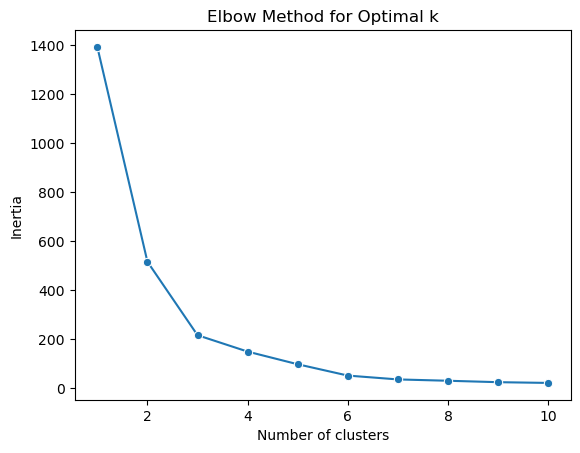

In [366]:
# Plotting the Elbow graph
sns.lineplot(x=range(1, 11),y=inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

##### 
Now, K-Means is then applied to the standardized data with the chosen number of clusters (k) based on the Elbow plot.

In [367]:
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster information to the original data
data['Cluster'] = clusters
data.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,1
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,2
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,0
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,1
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,2


In [368]:
# Analyze the segments
for i in range(k):
    print(f"Cluster {i}:")
    cluster_data = data[data['Cluster'] == i]
    print(cluster_data[features].describe())

Cluster 0:
              Age  Total Spend  Items Purchased  Average Rating
count  114.000000   114.000000       114.000000      114.000000
mean    39.403509   474.223684         8.517544        3.326316
std      2.802399    30.915447         1.041038        0.198246
min     35.000000   410.800000         7.000000        3.000000
25%     37.000000   443.325000         8.000000        3.200000
50%     41.000000   475.250000         9.000000        3.300000
75%     42.000000   500.750000         9.000000        3.500000
max     43.000000   530.400000        10.000000        3.600000
Cluster 1:
              Age  Total Spend  Items Purchased  Average Rating
count  117.000000   117.000000       117.000000      117.000000
mean    29.923077  1311.144444        17.615385        4.675214
std      1.320618   151.929971         2.548990        0.167077
min     28.000000  1120.200000        14.000000        4.300000
25%     29.000000  1160.600000        15.000000        4.500000
50%     30.000000 

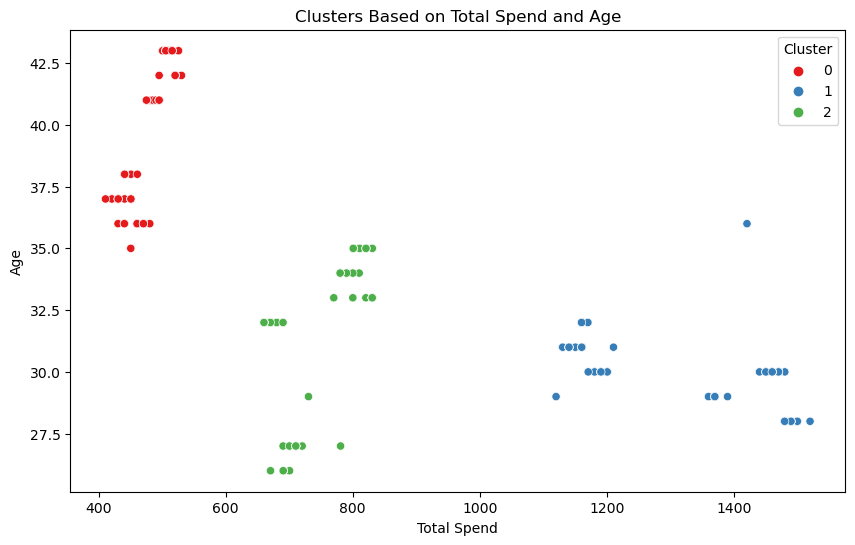

In [369]:
# Visualize the clusters based on two key features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Spend', y='Age', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters Based on Total Spend and Age')
plt.show()

## Interpretation
The results describe three distinct clusters based on customer age, total spend, items purchased, and average rating. Let's analyze each cluster:

#### Cluster 0: Older, Moderate Spenders with Average Satisfaction
* Age: The average age is around 39.4 years, with a range from 35 to 43 years.
* Total Spend: Customers in this cluster spend moderately, with an average spend of around 474.22 doller. The spending range is narrow, between 410.8 and  530.4 doller.
* Items Purchased: On average, they purchase about 8.5 items, with a slight variation.
* Average Rating: The satisfaction level, as indicated by the average rating, is relatively low at 3.3 out of 5.

###### Conclusion: 
This cluster represents older customers who make moderate purchases and are generally less satisfied with the products. Marketing strategies for this segment could focus on improving product satisfaction, perhaps through quality enhancements, targeted loyalty programs, or customer support initiatives.

#### Cluster 1: Young, High Spenders with High Satisfaction
* **Age**: The average age is approximately 29.9 years, with a range from 28 to 36 years.
* **Total Spend**: These customers are high spenders, with an average spend of 1311.14 doller. The spending range is wide, from 1120.2 to 1520.1 doller.
* **Items Purchased**: They purchase the most items on average, around 17.6, with some customers purchasing up to 21 items.
* **Average Rating**: This cluster has the highest satisfaction level, with an average rating of 4.67 out of 5.
###### Conclusion: 
This cluster consists of young, affluent customers who are highly satisfied with their purchases. They are likely to be the most valuable customers. Marketing efforts for this group could include premium offerings, exclusive deals, and personalized experiences to maintain and enhance their loyalty.

#### Cluster 2: Middle-Aged, Moderate Spenders with Good Satisfaction
* **Age**: The average age is around 31.6 years, with a range from 26 to 35 years.
* **Total Spend**: Customers in this cluster spend moderately, with an average spend of 748.43 doller. The spending range is between 660.3 and 830.9 doller.
* **Items Purchased**: On average, they purchase about 11.7 items, slightly more than Cluster 0 but less than Cluster 1.
* **Average Rating**: The satisfaction level is good, with an average rating of 4.05 out of 5.
###### Conclusion: 
This cluster includes middle-aged customers who make moderate purchases and have a good level of satisfaction. Marketing strategies could focus on maintaining their satisfaction levels, offering occasional incentives, and potentially upselling products to increase their spending.

### Overall Insights for Customer Segmentation
* **Targeting High-Value Customers**: Cluster 1 represents the most profitable segment due to their high spending and high satisfaction. Tailored marketing strategies like exclusive offers, loyalty rewards, and personalized communication could further enhance their loyalty.

* **Improving Satisfaction Among Older Customers**: Cluster 0 shows lower satisfaction despite being consistent spenders. Understanding their pain points through feedback and addressing them with improved products or services could increase their satisfaction and spending.

* **Maintaining Middle-Aged Customers**: Cluster 2 is a stable segment with moderate spending and good satisfaction. Periodic engagement and incentives could maintain their loyalty while gradually encouraging higher spending.

* **Age-Specific Campaigns**: The age distribution indicates that younger customers (Cluster 1) are more inclined towards higher spending and satisfaction. Tailoring marketing campaigns based on age-specific preferences can optimize engagement across different age groups.